In [1]:
! pip install lvm_read

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import lvm_read
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
cd /content/drive/MyDrive/lvm_csv/

/content/drive/MyDrive/lvm_csv


In [5]:
lvm0 = lvm_read.read('Vib_Pow_1440_Cage.lvm')
lvm1 = lvm_read.read('Vib_Pow_1440_OR.lvm')
lvm2 = lvm_read.read('Vib_Pow_1440_IR.lvm')
lvm3 = lvm_read.read('Vib_Pow_1440_healthy.lvm')

In [6]:
#for power and Vibration 
class segmentor:
    def __init__(self,sequence_length):
        self.X_data = []
        self.y_data = []
        self.l = sequence_length
    def addarray(self, data_t, class_type, n):
        done_locations = set()
        i = 0
        while i < n:
            start = random.randint(0,len(data_t)-self.l)
            if start not in done_locations:
                i+=1
                done_locations.add(start)
                self.X_data.append(data_t[start:start+self.l])
                self.y_data.append(class_type)
        pass
    def returndata(self):
        X_data = np.array(self.X_data)
        df = pd.DataFrame(X_data, columns = ['col_'+str(i) for i in range(self.l)]) 
        df['class'] = self.y_data
        df = df.sample(frac=1)
        return df

# **VIBRATION**

In [ ]:
X0 = lvm0[0]['data']
data_t1 = X0[:,1]
X1 = lvm1[0]['data']
data_t2 = X1[:,1]
X2 = lvm2[0]['data']
data_t3 = X2[:,1]
X3 = lvm3[0]['data']
data_t4 = X3[:,1]

In [ ]:
del X0, X1, X2, X3

In [57]:
seq_length = 50
n_samples = 1000000

In [ ]:
s = segmentor(seq_length)
s.addarray(data_t1, 0, n_samples)
s.addarray(data_t2, 1, n_samples)
s.addarray(data_t3, 2, n_samples)
s.addarray(data_t4, 3, n_samples)
df = s.returndata()

In [ ]:
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'class'],
      dtype='object')

In [ ]:
y = to_categorical(df['class'])
X = df.iloc[:, 0:50].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)

(3200000, 50) (3200000, 4)


In [ ]:
n_features = seq_length
n_classes = 4

model = Sequential()
model.add(Dense(128, input_dim=n_features, activation='sigmoid', kernel_initializer='he_normal'))
#model.add(Dropout(0.2))
model.add(Dense(32, activation='sigmoid', kernel_initializer='he_normal'))
model.add(Dense(n_classes, activation = 'softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [15]:
batch_size = 512
epochs = 100

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = epochs,
    batch_size = batch_size
)

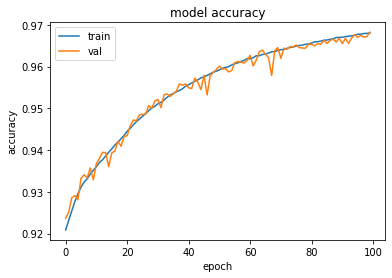

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

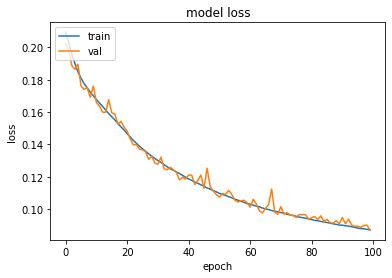

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
model.evaluate(x=X_test, y=y_test)

25000/25000 [==============================] - 89s 4ms/step - loss: 0.0856 - accuracy: 0.9688


[0.08563217520713806, 0.9688037633895874]

# **POWER**

In [7]:
X0 = lvm0[0]['data']
data_t1 = X0[:,3]
X1 = lvm1[0]['data']
data_t2 = X1[:,3]
X2 = lvm2[0]['data']
data_t3 = X2[:,3]
X3 = lvm3[0]['data']
data_t4 = X3[:,3]

In [8]:
del X0, X1, X2, X3

In [9]:
seq_length = 250
n_samples = 200000

In [10]:
s = segmentor(seq_length)
s.addarray(data_t1, 0, n_samples)
s.addarray(data_t2, 1, n_samples)
s.addarray(data_t3, 2, n_samples)
s.addarray(data_t4, 3, n_samples)
df = s.returndata()

In [12]:
y = to_categorical(df['class'])
X = df.iloc[:, 0:seq_length].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, y_train.shape)

(640000, 250) (640000, 4)


In [13]:
n_features = seq_length
n_classes = 4

model_power = Sequential()
model_power.add(Dense(128, input_dim=n_features, activation='sigmoid', kernel_initializer='he_normal'))
model_power.add(Dense(32, activation='sigmoid', kernel_initializer='he_normal'))
model_power.add(Dense(n_classes, activation = 'softmax'))
model_power.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [16]:
history_power = model_power.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = epochs,
    batch_size = batch_size
)

Epoch 1/100
1125/1125 [==============================] - 7s 4ms/step - loss: 0.6796 - accuracy: 0.6585 - val_loss: 0.5617 - val_accuracy: 0.6950
Epoch 2/100
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5612 - accuracy: 0.7048 - val_loss: 0.5564 - val_accuracy: 0.7153
Epoch 3/100
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5582 - accuracy: 0.7051 - val_loss: 0.5537 - val_accuracy: 0.7064
Epoch 4/100
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5554 - accuracy: 0.7049 - val_loss: 0.5516 - val_accuracy: 0.7020
Epoch 5/100
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5527 - accuracy: 0.7052 - val_loss: 0.5525 - val_accuracy: 0.7178
Epoch 6/100
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5500 - accuracy: 0.7052 - val_loss: 0.5474 - val_accuracy: 0.7031
Epoch 7/100
1125/1125 [==============================] - 4s 4ms/step - loss: 0.5486 - accuracy: 0.7044 - val_loss: 0.5468 - val_ac

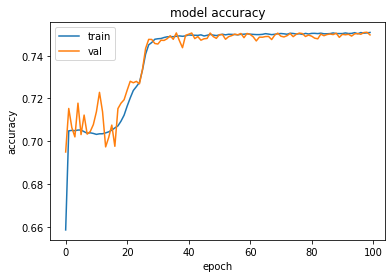

In [17]:
plt.plot(history_power.history['accuracy'])
plt.plot(history_power.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

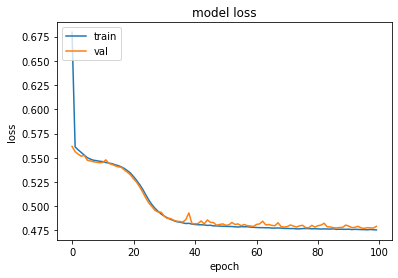

In [18]:
plt.plot(history_power.history['loss'])
plt.plot(history_power.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model_power.evaluate(x=X_test, y=y_test)

5000/5000 [==============================] - 16s 3ms/step - loss: 0.4786 - accuracy: 0.7490


[0.4785938858985901, 0.7489687204360962]